In [1]:
import pandas as pd
import numpy as np

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
np.random.seed(322)
fraud_df = pd.read_csv('/content/drive/MyDrive/creditcard_2023.csv')

In [4]:
#x = fraud_df.drop(['id','Class'],axis=1).values
y = fraud_df.Class.values
x = fraud_df.iloc[:,1:29].values
#x = fraud_df.iloc[:,12:14].values
z = fraud_df.iloc[:,12:14].values
print(z)

[[ 0.2934381  -0.94138613]
 [ 1.56424577  0.57407401]
 [ 0.65920066  0.80517319]
 ...
 [-0.46184889 -0.60609963]
 [ 0.33521507  0.46417742]
 [-1.1530113   0.48919666]]


In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test, z_train, z_test = train_test_split(x,y,z,test_size=0.99)
#x_train, x_test, y_train, y_test, z_train, z_test = train_test_split(x,y,z,test_size=0.9999)

In [6]:
from sklearn.preprocessing import StandardScaler
x_train_std = StandardScaler().fit_transform(x_train)
x_test_std = StandardScaler().fit_transform(x_test)
z_train_std = StandardScaler().fit_transform(z_train)
z_test_std = StandardScaler().fit_transform(z_test)

In [7]:
from sklearn.decomposition import PCA
n_components = 2
pca = PCA(n_components=n_components)
x_train_pca = pca.fit_transform(x_train_std)
x_test_pca = pca.fit_transform(x_test_std)

In [ ]:
from sklearn import svm
clf = svm.SVC()
clf.fit(x_train_std, y_train)

SVC()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid']
}

svm = SVC()

grid_search = GridSearchCV(estimator=svm, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(x_train_pca, y_train)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters:", best_params)
print("Best accuracy:", best_score)


Best parameters: {'C': 100, 'kernel': 'rbf'}
Best accuracy: 0.9215602988161429


In [ ]:
import pandas as pd

results_df = pd.DataFrame(grid_search.cv_results_)

results_df = results_df[['param_C', 'param_kernel', 'mean_test_score', 'std_test_score']]

results_df.sort_values(by='mean_test_score', ascending=False, inplace=True)

print(results_df)


   param_C param_kernel  mean_test_score  std_test_score
14     100          rbf         0.921560        0.007587
10      10          rbf         0.918570        0.007175
6        1          rbf         0.915228        0.009317
1      0.1         poly         0.914701        0.008056
5        1         poly         0.910832        0.007970
13     100         poly         0.909953        0.007215
9       10         poly         0.909777        0.007469
8       10       linear         0.909425        0.009506
12     100       linear         0.909425        0.009506
4        1       linear         0.909424        0.009858
0      0.1       linear         0.909249        0.009912
2      0.1          rbf         0.906083        0.009560
3      0.1      sigmoid         0.893597        0.008233
7        1      sigmoid         0.866338        0.002810
11      10      sigmoid         0.862293        0.003058
15     100      sigmoid         0.862117        0.003204


Наилучшая аккуратность была получена с ядром RBF и параметром С равным 100.

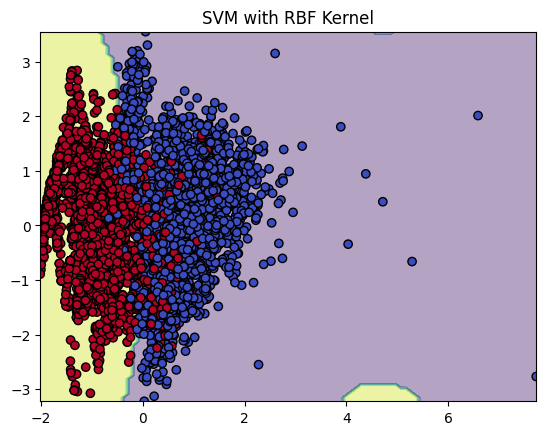

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

svm = SVC(kernel='rbf', C=100)
svm.fit(z_train, y_train)

xx, yy = np.meshgrid(np.linspace(z_train[:, 0].min(), z_train[:, 0].max(), 100),
                     np.linspace(z_train[:, 1].min(), z_train[:, 1].max(), 100))
zz = svm.predict(np.c_[xx.ravel(), yy.ravel()])
zz = zz.reshape(xx.shape)

plt.contourf(xx, yy, zz, alpha=0.4)
plt.scatter(z_train[:, 0], z_train[:, 1], c=y_train, cmap='coolwarm', edgecolors='k')
plt.title('SVM with RBF Kernel')
plt.show()
